In [1]:
import json
import networkx as nx
from networkx import json_graph

import pandas as pd
import numpy as np
import time
import re

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV

from sklearn.svm import SVC
from sklearn.naive_bayes import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler

import pydotplus

In [2]:
df = pd.read_pickle('dataframe.plk')
labels = df['label'].to_list()
class_names = ['encryption', 'sort', 'math', 'string']

In [3]:
df = df.drop('label', axis=1)
df.describe()

,n_nodes,cyclomatic_complexity,n_cycles,n_memory_ins,n_arithmetic_ins,n_float_ins,n_bitwise_ins,n_jumps,n_comparisons,n_calls
count,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000
mean,18.574217,11.477669,9.872543,67.124540,18.738973,20.801486,70.839342,12.694103,9.063902,3.898659
std,22.189614,17.067398,16.687443,138.409361,45.631754,57.272675,203.778394,14.236532,11.488972,11.795867
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,1.000000,13.000000,3.000000,1.000000,8.000000,4.000000,1.000000,1.000000
50%,13.000000,8.000000,6.000000,36.000000,7.000000,5.000000,23.000000,9.000000,6.000000,1.000000
75%,23.000000,14.000000,12.000000,68.000000,18.000000,14.000000,56.000000,16.000000,12.000000,4.000000
max,386.000000,384.000000,383.000000,3354.000000,966.000000,1541.000000,3774.000000,158.000000,145.000000,384.000000


In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.20)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

Size of training set: 11517
Size of test set: 2880


training time =  109.28121590614319
Accuracy 0.865
[[495  16  66  11]
 [  8 820  40  22]
 [ 25  38 691  40]
 [  9  27  87 485]]
              precision    recall  f1-score   support

  encryption       0.92      0.84      0.88       588
        math       0.91      0.92      0.92       890
        sort       0.78      0.87      0.82       794
      string       0.87      0.80      0.83       608

    accuracy                           0.86      2880
   macro avg       0.87      0.86      0.86      2880
weighted avg       0.87      0.86      0.87      2880

[[495  16  66  11]
 [  8 820  40  22]
 [ 25  38 691  40]
 [  9  27  87 485]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

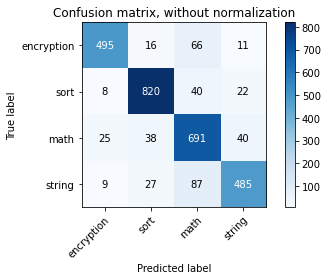

In [6]:
svclassifier = SVC(kernel='linear')
start = time.time()
svclassifier.fit(X_train, y_train)
end = time.time()
print('training time = ', end-start)

acc = svclassifier.score(X_test, y_test)    
print("Accuracy %.3f" %acc)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

training time =  1.1439297199249268
Accuracy 0.850
[[480  23  71  14]
 [  2 827  31  30]
 [ 29  52 623  90]
 [ 10  20  61 517]]
              precision    recall  f1-score   support

  encryption       0.92      0.82      0.87       588
        math       0.90      0.93      0.91       890
        sort       0.79      0.78      0.79       794
      string       0.79      0.85      0.82       608

    accuracy                           0.85      2880
   macro avg       0.85      0.85      0.85      2880
weighted avg       0.85      0.85      0.85      2880

[[480  23  71  14]
 [  2 827  31  30]
 [ 29  52 623  90]
 [ 10  20  61 517]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

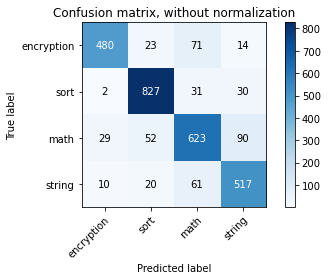

In [7]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

svclassifier_s = SVC(kernel='linear')
start = time.time()
svclassifier_s.fit(X_train_s, y_train)
end = time.time()
print('training time = ', end-start)

acc = svclassifier_s.score(X_test_s, y_test)    
print("Accuracy %.3f" %acc)

y_pred_s = svclassifier_s.predict(X_test_s)

print(confusion_matrix(y_test,y_pred_s))
print(classification_report(y_test,y_pred_s))

cm = confusion_matrix(y_test, y_pred_s, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred_s, classes=class_names, normalize=False)

training time =  3.8796231746673584
Accuracy 0.478
[[323 201  64   0]
 [  2 885   3   0]
 [  7 633 154   0]
 [  1 532  60  15]]
              precision    recall  f1-score   support

  encryption       0.97      0.55      0.70       588
        math       0.39      0.99      0.56       890
        sort       0.55      0.19      0.29       794
      string       1.00      0.02      0.05       608

    accuracy                           0.48      2880
   macro avg       0.73      0.44      0.40      2880
weighted avg       0.68      0.48      0.41      2880

[[323 201  64   0]
 [  2 885   3   0]
 [  7 633 154   0]
 [  1 532  60  15]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

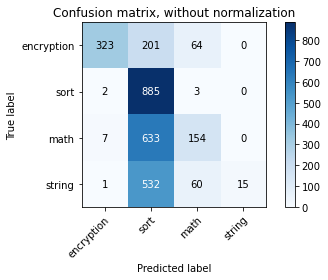

In [8]:
svclassifier_poly = SVC(kernel='poly')
start = time.time()
svclassifier_poly.fit(X_train, y_train)
end = time.time()
print('training time = ', end-start)

acc = svclassifier_poly.score(X_test, y_test)    
print("Accuracy %.3f" %acc)

y_pred = svclassifier_poly.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

cm_svclassifier_poly = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm_svclassifier_poly)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

training time =  2.319797992706299
Accuracy 0.795
[[415  37 125  11]
 [  9 816  51  14]
 [ 18  43 644  89]
 [  1  40 152 415]]
              precision    recall  f1-score   support

  encryption       0.94      0.71      0.81       588
        math       0.87      0.92      0.89       890
        sort       0.66      0.81      0.73       794
      string       0.78      0.68      0.73       608

    accuracy                           0.80      2880
   macro avg       0.81      0.78      0.79      2880
weighted avg       0.81      0.80      0.80      2880

[[415  37 125  11]
 [  9 816  51  14]
 [ 18  43 644  89]
 [  1  40 152 415]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

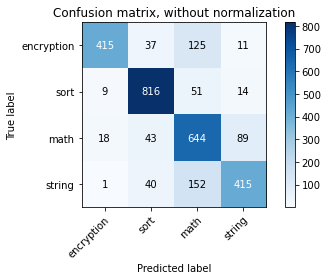

In [9]:
svclassifier_rbf = SVC(kernel='rbf')
start = time.time()
svclassifier_rbf.fit(X_train, y_train)
end = time.time()
print('training time = ', end-start)

acc = svclassifier_rbf.score(X_test, y_test)    
print("Accuracy %.3f" %acc)

y_pred = svclassifier_rbf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

cm_svclassifier_rbf = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm_svclassifier_rbf)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

training time =  2.239011526107788
Accuracy 0.614
[[379  34  63 112]
 [ 78 711  48  53]
 [256  27 307 204]
 [117   5 114 372]]
              precision    recall  f1-score   support

  encryption       0.46      0.64      0.53       588
        math       0.92      0.80      0.85       890
        sort       0.58      0.39      0.46       794
      string       0.50      0.61      0.55       608

    accuracy                           0.61      2880
   macro avg       0.61      0.61      0.60      2880
weighted avg       0.64      0.61      0.62      2880

[[379  34  63 112]
 [ 78 711  48  53]
 [256  27 307 204]
 [117   5 114 372]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

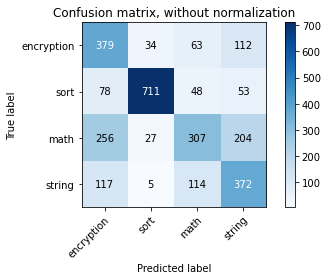

In [10]:
svclassifier_sigmoid = SVC(kernel='sigmoid')
start = time.time()
svclassifier_sigmoid.fit(X_train, y_train)
end = time.time()
print('training time = ', end-start)

acc = svclassifier_sigmoid.score(X_test, y_test)    
print("Accuracy %.3f" %acc)

y_pred = svclassifier_sigmoid.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

cm_svclassifier_sigmoid = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm_svclassifier_sigmoid)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

training time =  0.04285717010498047


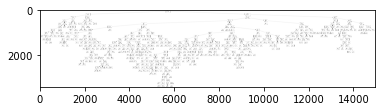

In [11]:
dtree = DecisionTreeClassifier()
start = time.time()
dtree = dtree.fit(X_train, y_train)
end = time.time()
print('training time = ', end-start)

data = tree.export_graphviz(dtree, out_file=None, feature_names=['n_nodes', 'cyclomatic_complexity', 'n_cycles', 
                                                                 'n_memory_ins', 'n_arithmetic_ins', 'n_float_ins', 
                                                                 'n_bitwise_ins','n_jumps', 'n_comparisons', 'n_calls'])
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

Accuracy DecisionTree 0.996
[[587   0   0   1]
 [  0 889   0   1]
 [  0   0 792   2]
 [  4   2   2 600]]
              precision    recall  f1-score   support

  encryption       0.99      1.00      1.00       588
        math       1.00      1.00      1.00       890
        sort       1.00      1.00      1.00       794
      string       0.99      0.99      0.99       608

    accuracy                           1.00      2880
   macro avg       1.00      1.00      1.00      2880
weighted avg       1.00      1.00      1.00      2880

[[587   0   0   1]
 [  0 889   0   1]
 [  0   0 792   2]
 [  4   2   2 600]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

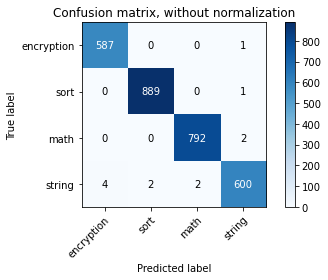

In [12]:
acc_tree = dtree.score(X_test, y_test)    
print("Accuracy DecisionTree %.3f" %acc_tree)

y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree, labels=None, sample_weight=None)
print(cm_tree)
plot_confusion_matrix(y_test, y_pred_tree, classes=class_names, normalize=False)

In [13]:
#K-Fold Cross Validation 
cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=15)
scores = cross_val_score(svclassifier, df, labels, cv=cv)
print(scores)
print("Accuracy SV classifier with linear kernel: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.87403545 0.87486966 0.8717414  0.88550574 0.88008342]
Accuracy SV classifier with linear kernel: 0.877 (+/- 0.01)


In [23]:
X = scaler.fit_transform(df)
scores = cross_val_score(svclassifier_s, X, labels, cv=cv)
print(scores)
print("Accuracy SV classifier with linear kernel: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.85693431 0.86402503 0.86485923 0.8725756  0.87194995]
Accuracy SV classifier with linear kernel: 0.866 (+/- 0.01)


In [14]:
scores = cross_val_score(svclassifier_poly, df, labels, cv=cv)
print(scores)
print("Accuracy SV classifier with polynomial kernel: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.47799791 0.46006257 0.48321168 0.49655892 0.47236705]
Accuracy SV classifier with polynomial kernel: 0.478 (+/- 0.02)


In [15]:
scores = cross_val_score(svclassifier_rbf, df, labels, cv=cv)
print(scores)
print("Accuracy SV classifier with rbf kernel: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.80229406 0.8008342  0.80229406 0.81376434 0.81293014]
Accuracy SV classifier with rbf kernel: 0.806 (+/- 0.01)


In [16]:
scores = cross_val_score(svclassifier_sigmoid, df, labels, cv=cv)
print(scores)
print("Accuracy SV classifier: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.57977059 0.70531804 0.71741397 0.56767466 0.60771637]
Accuracy SV classifier: 0.636 (+/- 0.13)


In [17]:
scores = cross_val_score(dtree, df, labels, cv=cv)
print(scores)
print("Accuracy Decision Tree: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99270073 0.99562044 0.99395203 0.99186653 0.99353493]
Accuracy Decision Tree: 0.994 (+/- 0.00)


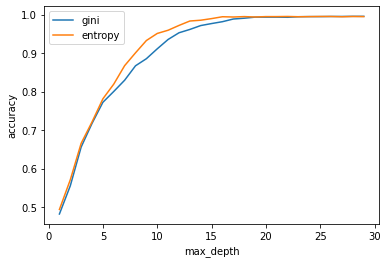

In [18]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(dtree.score(X_test, y_test))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(dtree.score(X_test, y_test))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()


training time =  0.03786492347717285


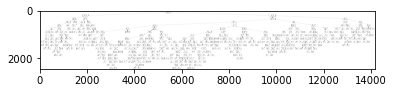

Accuracy DecisionTree 0.996
[[586   0   2   0]
 [  2 888   0   0]
 [  2   0 790   2]
 [  1   2   1 604]]
              precision    recall  f1-score   support

  encryption       0.99      1.00      0.99       588
        math       1.00      1.00      1.00       890
        sort       1.00      0.99      1.00       794
      string       1.00      0.99      1.00       608

    accuracy                           1.00      2880
   macro avg       1.00      1.00      1.00      2880
weighted avg       1.00      1.00      1.00      2880

[[586   0   2   0]
 [  2 888   0   0]
 [  2   0 790   2]
 [  1   2   1 604]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

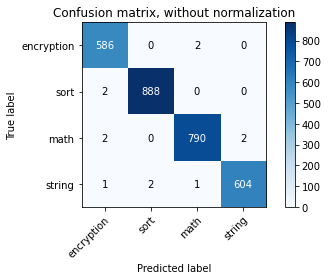

In [19]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=17)
start = time.time()
dtree = dtree.fit(X_train, y_train)
end = time.time()
print('training time = ', end-start)

data = tree.export_graphviz(dtree, out_file=None, feature_names=['n_nodes', 'cyclomatic_complexity', 'n_cycles', 
                                                                 'n_memory_ins', 'n_arithmetic_ins', 'n_float_ins', 
                                                                 'n_bitwise_ins','n_jumps', 'n_comparisons', 'n_calls'])
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree_maxdepth.png')

img=pltimg.imread('mydecisiontree_maxdepth.png')
imgplot = plt.imshow(img)
plt.show()

acc_tree = dtree.score(X_test, y_test)    
print("Accuracy DecisionTree %.3f" %acc_tree)

y_pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree, labels=None, sample_weight=None)
print(cm_tree)
plot_confusion_matrix(y_test, y_pred_tree, classes=class_names, normalize=False)

In [20]:
scores = cross_val_score(dtree, df, labels, cv=cv)
print(scores)
print("Accuracy Decision Tree: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99416058 0.99374348 0.99499479 0.99541189 0.99207508]
Accuracy Decision Tree: 0.994 (+/- 0.00)


In [25]:
# save the model to disk
import pickle
filename = 'final_model.sav'
pickle.dump(dtree, open(filename, 'wb'))